In [1]:
import speech_recognition as sr

import pandas as pd

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import cess_esp
from nltk.tag.hmm import HiddenMarkovModelTagger

from nltk.chunk.regexp import *

from datetime import datetime
import wikipedia

from urllib.request import Request, urlopen
from bs4 import BeautifulSoup
from lat_lon_parser import parse

import requests, pyttsx3, openai, geopy

from deep_translator import GoogleTranslator

from datetime import timedelta

In [2]:
openAIKEY = ""

In [3]:
traductor_es = GoogleTranslator(source='en', target='es')
traductor_en = GoogleTranslator(source='es', target='en')

In [4]:
hmm = HiddenMarkovModelTagger.train(cess_esp.tagged_sents())

In [5]:
def tokenizar(_frase):
    return word_tokenize(_frase)

def taggear(_tokens):
    return hmm.tag(_tokens)

In [24]:
taggear(tokenizar('Quiero saber el resultado del Barcelona contra Juventus'))

[('Quiero', 'sps00'),
 ('saber', 'vmn0000'),
 ('el', 'da0ms0'),
 ('resultado', 'ncms000'),
 ('del', 'spcms'),
 ('Barcelona', 'np0000l'),
 ('contra', 'sps00'),
 ('Juventus', 'np0000o')]

In [31]:
reglas = """
Partido: <Equipo> { <sp.*> } <Equipo>
Equipo: { <nc.* | np.* > <np.*> }
Equipo: { <np.*> }

"""
parser = nltk.RegexpParser(reglas)


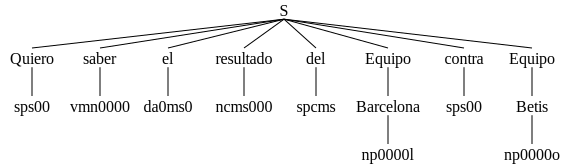

In [32]:
parser.parse(taggear(tokenizar('Quiero saber el resultado del Barcelona contra Betis')))

In [ ]:
def extrae_weather(_tree):
    
    result = {}
    
    for nodo in _tree:
        
        if type(nodo) != tuple:
            
            if nodo.label() == 'Lugar':
                lugar = ' '.join([ hoja[0] for hoja in nodo.leaves() ])
                result['lugar'] = lugar
                
                
            if nodo.label() == 'Fecha':
                fecha = ' '.join([ hoja[0] for hoja in nodo.leaves() ])
                result['fecha'] = fecha
                
    if result['fecha'] == 'hoy':
        result['fecha'] = datetime.now().strftime('%Y-%m-%d')
        result['fecha_texto'] = 'hoy'
    elif result['fecha'] == 'mañana':
        result['fecha'] = (datetime.now() + timedelta(days=1)).strftime('%Y-%m-%d')
        result['fecha_texto'] = 'mañana'
        
    latitude, logitude = geopy.geocoders.Nominatim(user_agent="Alexa").geocode(result['lugar'])[1]
    result['latitud'] = latitude
    result['longitud'] = logitude
                
    return result